# Mandatory Assignment 1

This is the first of two mandatory assignments which must be completed during the course. First some practical information:

* When is the assignment due?: **23:59, Sunday, August 19, 2018.**
* How do you grade the assignment?: You will **peergrade** each other as primary grading. 
* Can i work with my group?: **yes**

The assigment consist of one to tree problems from each of the exercise sets you have solved so far (excluding Set 1). We've tried to select problems which are self contained, but it might be nessecary to solve some of the previous exercises in each set to fully answer the problems in this assignment.

## Problems from Exercise Set 2:

> **Ex. 2.2**: Make two lists. The first should be numbered. The second should be unnumbered and contain at least one sublevel. 

**Numbered list**
1. First
2. Second
3. Third

**Unnumnbered list**
- Level 1
- Level 1
    - Level 2
        - Level 3
- Level 1

## Problems from Exercise set 3:

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence `"Is r > g?"` using your knowledge about string formatting. Store this new string in a variable called `answer_31`. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [37]:
# [Answer to Ex. 3.1.3 here]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']

# answer_31 = 

# YOUR CODE HERE
ll = ['r ', 'Is', '>', ' < ', 'g ', '?']
ll = (ll[1],' ',ll[0],ll[2],' ',ll[4],ll[-1])

# convert 'list' to 'string'
string_ll = ''.join(ll)

# check whether there is only one space betwen words:
string_ll2 = string_ll.replace(' ','')
print('Test for only one space between words:', string_ll2)
# there is only one space between words in string_ll

#Remove space before '?':
import re
answer_31 = re.sub(r'\s([?])', r'\1', string_ll)

print(answer_31)

Test for only one space between words: Isr>g?
Is r > g?


In [38]:
assert answer_31 == "Is r > g?"

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`. Store the result in a new variable called `answer_32`.
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [39]:
# [Answer to Ex. 3.1.4 here]
W = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']

# answer_32 = 


# YOUR CODE HERE
words = []

for x in range (0,7):
    if 'a' in W[x][:1] or 'e' in W[x][:1] or 'i' in W[x][:1] or 'o' in W[x][:1] or 'u' in W[x][:1]:
        words.append(True)
    else:
        words.append(False)

key_value_pairs = list(zip(W,words, ))

answer_32 = dict(key_value_pairs)
answer_32

{'animal': True,
 'arise': True,
 'coffee': False,
 'knowledge': False,
 'python': False,
 'tread': False,
 'unit': True}

In [40]:
assert answer_32 == {i: i[0] in 'aeiou' for i in W}
assert sorted(answer_32) == sorted(W)

> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` which you defined in the previous question (ex 3.3.1) to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.
>
> Store the birth data in a new variable called `answer_33`.
>
>> _Hint:_ The `requests.response` object has a `.json()` method. 
>
>> _Note:_ you wrote `construct_link()` in 3.3.1, if you didn't heres the link you need to get: `https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*`

In [41]:
# [Answer to Ex. 3.3.2 here]

# answer_33 = 

# YOUR CODE HERE
# instal required package
import requests

'https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*'

# This function will do it for you
def construct_link(table_id, variables):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    
    for var in variables:
        base += '&{v}'.format(v = var)

    return base 

construct_link('FOLK1A', ['Tid=*'])


'https://api.statbank.dk/v1/data/FOLK1A/JSONSTAT?lang=en&Tid=*'

In [42]:
# Construct the woman birth URL
s1 = construct_link('FOD', ['Tid=*', 'BARNKON=P'])

def send_GET_request(URL):
    get_data = requests.get(URL)
    get_data.ok
    get_data = get_data.json()
    return get_data

answer_33 = send_GET_request(s1)

In [43]:
assert sorted(answer_33['dataset'].keys()) == ['dimension', 'label', 'source', 'updated', 'value']
assert 'BARNKON' in answer_33['dataset']['dimension'].keys()

## Problems from exercise set 4


In [44]:
import numpy as np
import pandas as pd

> **Ex. 4.1.1:** Use Pandas' CSV reader to fetch  daily data weather from 1864 for various stations - available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/). Store the dataframe in a variable called `answer_41`.
>
>> *Hint 1*: for compressed files you may need to specify the keyword `compression`.
>
>> *Hint 2*: keyword `header` can be specified as the CSV has no column names.
>
>> *Hint 3*: Specify the path, as the URL linking directly to the 1864 file. 

In [45]:
# [Answer to Ex. 4.1.1 here]

# answer_41 = 

# YOUR CODE HERE
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

answer_41 = pd.read_csv(url, sep = ',', header = None)

In [46]:
assert answer_41.shape == (27349, 8)
assert list(answer_41.columns) == list(range(8))

> **Ex. 4.1.2:** Structure your weather DataFrame by using only the relevant columns (station identifier, data, observation type, observation value), rename them. Make sure observations are correctly formated (how many decimals should we add? one?).
>
> Store the resulting dataframe in a new variable called `answer_42`.
>
>> *Hint:* rename can be done with `df.columns=COLS` where `COLS` is a list of column names.

In [47]:
# [Answer to Ex. 4.1.2 here]

# answer_42 = 

# YOUR CODE HERE
# Drop non important columns
answer_42 = answer_41.iloc[:,[0,1,2,3]]

# Rename columns
answer_42.columns = ['station identifier', 'data', 'observation type', 'observation value']

# Change data type of 'observation value' to float with one decimal
answer_42 = answer_42.astype({"observation value": float})
answer_42['observation value'] = answer_42['observation value'] / 10
answer_42.head()

,station identifier,data,observation type,observation value
0,ITE00100550,18640101,TMAX,1.0
1,ITE00100550,18640101,TMIN,-2.3
2,ITE00100550,18640101,PRCP,2.5
3,ASN00079028,18640101,PRCP,0.0
4,USC00064757,18640101,PRCP,11.9


In [48]:
assert answer_42.shape == (27349, 4)
assert 144.8 in [answer_42[i].max() for i in answer_42]
assert -666.0 in [answer_42[i].min() for i in answer_42]
assert 18640101 in [answer_42[i].min() for i in answer_42]

> **Ex. 4.1.3:**  Select data for the station `ITE00100550` and only observations for maximal temperature. Make a copy of the DataFrame. Explain in a one or two sentences how copying works.
>
> Store the subsetted dataframe in a new variable called `answer_43`.
>
>> *Hint 1*: the `&` operator works elementwise on boolean series (like `and` in core python).
>
>> *Hint 2*: copying of the dataframe is done with the `copy` method for DataFrames.

In [49]:
# [Answer to Ex. 4.1.3 here]

# answer_43 = 


# YOUR CODE HERE
answer_43 = answer_42.copy()
answer_43 = answer_43.loc[(answer_43['station identifier'] == 'ITE00100550') & (answer_43['observation type'] == 'TMAX')]

In [50]:
assert 'ITE00100550' in [answer_43[i].min() for i in answer_43]
assert 'ITE00100550' in [answer_43[i].max() for i in answer_43]
assert 'TMAX' in [answer_43[i].min() for i in answer_43]
assert 'TMAX' in [answer_43[i].max() for i in answer_43]

> **Ex. 4.1.4:** Make a new column in `answer_44` called `TMAX_F` where you have converted the temperature variables to Fahrenheit. Make sure not to overwrite `answer_43`.
>
> Store the resulting dataframe in a variable called `answer_44`.
>
>> *Hint*: Conversion is $F = 32 + 1.8*C$ where $F$ is Fahrenheit and $C$ is Celsius.

In [51]:
# [Answer to Ex. 4.1.4 here]
answer_44 = answer_43.copy()
# answer_44 = 

# YOUR CODE HERE
pd.to_numeric(answer_44['observation value'])
answer_44['TMAX_F'] = 32 + 1.8 * answer_44['observation value']

In [52]:
assert set(answer_44.columns) -  set(answer_43.columns) == {'TMAX_F'}

## Problems from exercise set 5

In [53]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

> **Ex. 5.1.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


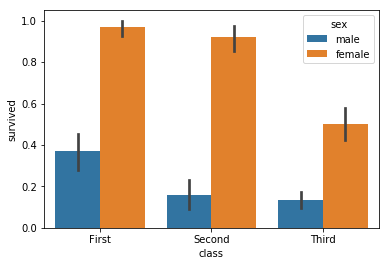

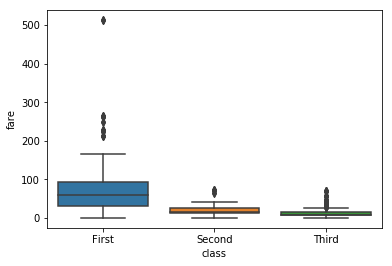

In [54]:
# [Answer to Ex. 5.1.1 here]

# YOUR CODE HERE
print(titanic.head(4))

# Barplot showing the prob of survival for men and woman within each passenger class
tips = sns.load_dataset("titanic")
ax = sns.barplot(x="class", y="survived", hue="sex", data=tips)

# Bonus: Boxplot for the fare-prices within each passenger class.
f,ax = plt.subplots()
sns.boxplot(x='class', y='fare', data=tips, ax=ax)

> **Ex. 5.1.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Sepal length'),
 Text(0.5, 0, 'Petal length'),
 Text(0.5, 1.0, 'Iris')]

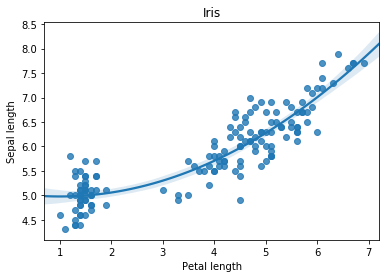

In [55]:
# [Answer to Ex. 5.1.2 here]

# YOUR CODE HERE
ax1 = sns.regplot(x = 'petal_length', y = 'sepal_length', data = iris, order = 2)
ax1.set(title = 'Iris',
        xlabel = 'Petal length',
        ylabel = 'Sepal length')

> **Ex. 5.1.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


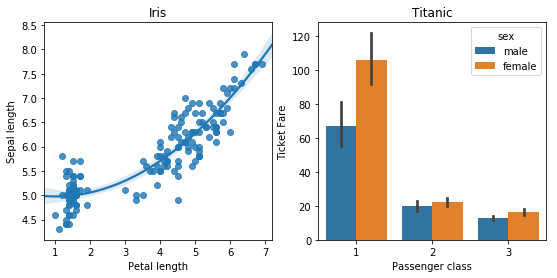

In [56]:
# [Answer to Ex. 5.1.3 here]

# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
ax1 = sns.regplot(x = 'petal_length', y = 'sepal_length', data = iris, order = 2, ax = ax1)
ax1.set(title = 'Iris',
        xlabel = 'Petal length',
        ylabel = 'Sepal length')

ax2 = sns.barplot(x = 'pclass', y= 'fare', hue = 'sex', data = titanic, ax = ax2)
ax2.set(title = 'Titanic', 
        xlabel = 'Passenger class', 
        ylabel = 'Ticket Fare')

plt.show()

> **Ex. 5.1.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


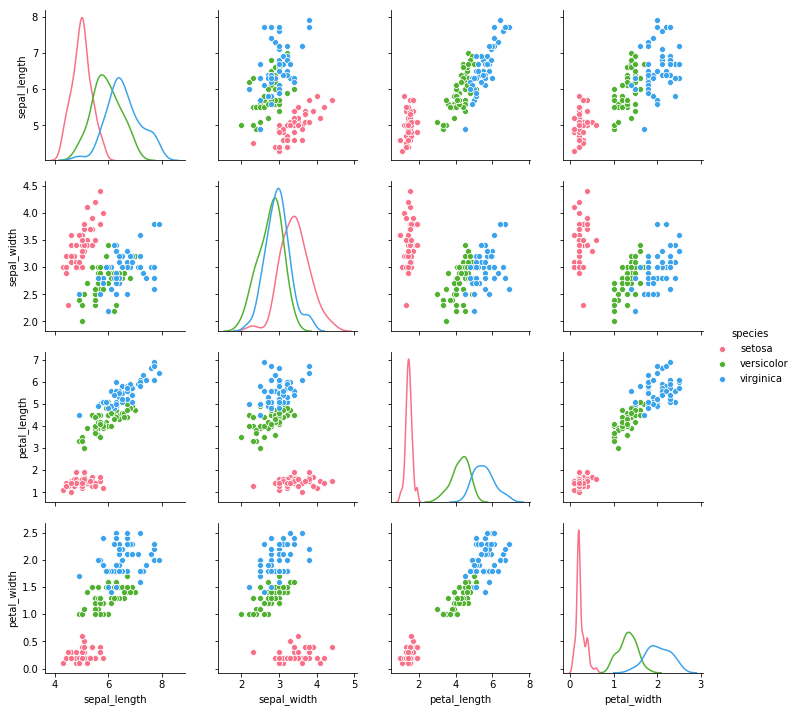

In [57]:
# [Answer to Ex. 5.1.4 here]

# YOUR CODE HERE
grid = sns.pairplot(iris, hue = 'species', palette = 'husl',
                   diag_kws = {'shade': False}
                   )

## Problems from exercise set 6

> _Note:_ In the exercises we asked you to download weather data from the NOAA website. For this assignment the data are loaded in the following code cell into two pandas dataframes.

In [58]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

weather_1864 = pd.read_csv('weather_data_1864.csv')

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.
>
> Create a new column in `weather_1864` called `answer_61` and store the country codes here.
>
>> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module.

In [59]:
# [Answer to Ex. 6.1.4]
# weather_1864['answer_61'] =

# YOUR CODE HERE
weather_1864.head()
weather_1864['answer_61'] = weather_1864['station'].str.extract(r'([A-z]+)')

In [60]:
assert sorted(weather_1864['answer_61'].str[:2].unique()) == sorted(['SZ', 'CA', 'EZ', 'GM', 'AU', 'IT', 'BE', 'UK', 'EI', 'AG', 'AS'])

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 
>
> Name your function `prepareWeatherData`.

In [61]:
# [Answer to Ex. 6.1.5]

def prepareWeatherData(year):
    df = pd.read_csv('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/%s.csv.gz' % year, header = None)
    df = df.drop([4,5,6,7], axis = 1) #Delete these columns
    df.columns = ['Station identifier', 'Date', 'Observation type', 'Observation value']
    
    conditions = (df['Observation type'] == 'TMAX') #Select only TMAX observations
    df = df[conditions].copy()
    df['Observation value'] = df['Observation value'] / 10 #For some reason
    df['TMAX_F'] = 32 + 1.8*df['Observation value'] #Add Fahrenheit
    df['Date'] = pd.to_datetime(df['Date'].apply(str)) #Convert to string and then DateTime
    #df['Month'] = df['Date'].dt.month
    df['Country code'] = df['Station identifier'].str.extract(r'([A-z]+)') #Get country code with Regex
    
    df.reset_index(drop = True, inplace = True)
    
    return df

prepareWeatherData('1864').head()

,Station identifier,Date,Observation type,Observation value,TMAX_F,Country code
0,ITE00100550,1864-01-01,TMAX,1.0,33.80,ITE
1,ASN00086071,1864-01-01,TMAX,21.4,70.52,ASN
2,CA006158350,1864-01-01,TMAX,1.1,33.98,CA
3,EIE00101859,1864-01-01,TMAX,9.4,48.92,EIE
4,BE000006447,1864-01-01,TMAX,-2.3,27.86,BE


In [62]:
assert prepareWeatherData('1864').shape == (5686, 6)

## Problems from exercise set 7

> _Note:_ Once again if you haven't managed to download the data from NOAA, you can refer to the github repo to get csv-files containing the required data.

In [63]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

> **Ex. 7.1.1:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for our station with the ID _'ITE00100550'_ in 1864. 

> *Hint*: the method `describe` computes all these measures.

In [64]:
# [Answer to Ex. 7.1.1]
# Get Data
# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6

def get_weather_data(year):
    df = pd.read_csv('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/%d.csv.gz' % year, header = None)
    df = df.drop([4,5,6,7], axis = 1) #Delete these columns
    df.columns = ['Station identifier', 'Date', 'Observation type', 'Observation value']
    
    conditions = (df['Observation type'] == 'TMAX') #Select only TMAX observations
    df = df[conditions].copy()
    df['Observation value'] = df['Observation value'] / 10 #For some reason
    df['TMAX_F'] = 32 + 1.8*df['Observation value'] #Add Fahrenheit
    df['Date'] = pd.to_datetime(df['Date'].apply(str)) #Convert to string and then DateTime
    df['Month'] = df['Date'].dt.month
    df['Country code'] = df['Station identifier'].str.extract(r'([A-z]+)') #Get country code with Regex
    
    df.reset_index(drop = True, inplace = True)
    
    return df

weather_df = get_weather_data(1864)
weather_df.head()

# YOUR CODE HERE
weather_df[weather_df['Station identifier'] == 'ITE00100550'].groupby(['Month'])['Observation value'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,31.0,-0.077419,3.064605,-6.3,-2.200,0.00,1.900,5.3
2,29.0,4.134483,3.031652,-1.8,1.500,4.40,6.800,8.4
3,31.0,12.200000,2.780408,7.9,10.050,12.10,14.150,18.0
4,30.0,16.243333,4.487199,6.3,14.425,16.25,18.400,25.1
5,31.0,21.470968,3.312622,14.0,19.500,21.10,23.800,27.0
6,30.0,26.670000,2.926355,20.4,25.100,27.40,28.500,31.3
7,31.0,29.387097,1.913068,25.4,28.450,29.80,30.900,32.5
8,31.0,28.922581,3.794708,21.0,26.450,29.30,31.600,34.8
9,30.0,24.103333,3.620772,18.0,21.500,23.35,26.800,29.9


> **Ex. 7.1.2:** Get the processed data from years 1864-1867 as a list of DataFrames. Convert the list into a single DataFrame by concatenating vertically. 
>
> Name the concatenated data `answer_72`

In [65]:
# [Answer to Ex. 7.1.2]

# YOUR CODE HERE
answer_72 = [get_weather_data(year) for year in range(1864, 1868)]
answer_72 = pd.concat(answer_72)

In [66]:
assert answer_72.shape == (30003, 7)

> **Ex. 7.1.3:** Parse the station location data which you can find at https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt. Merge station locations onto the weather data spanning 1864-1867.  
>
> Store the merged data in a new variable called `answer_73`.
>
> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [67]:
# [Answer to Ex. 7.1.3]

# YOUR CODE HERE
# Download data
location_data = pd.read_fwf('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                            header = None)
location_data.head()

# Drop all columns but 0 and 4 
#location_data.drop([1,2,3,5,6,7], inplace = True, axis = 1)

# Rename columns
location_data.columns = ['Station identifier', 'Latitude', 'Longitude','Elevation','Location','Name','GSN Flag','HCN/CRN Flag']
location_data.head()

# Join the two data sources
answer_73 = answer_72.merge(right = location_data, 
           how = 'left', 
           left_on = 'Station identifier', 
           right_on = 'Station identifier')

# Adding an extra column to fit with the assertation test after having talked to the TA
answer_73['EXTRA column'] = 0
answer_73.head()

,Station identifier,Date,Observation type,Observation value,TMAX_F,Month,Country code,Latitude,Longitude,Elevation,Location,Name,GSN Flag,HCN/CRN Flag,EXTRA column
0,ITE00100550,1864-01-01,TMAX,1.0,33.80,1,ITE,44.5000,11.3458,53.0,BOLOGNA,NaN,NaN,NaN,0
1,ASN00086071,1864-01-01,TMAX,21.4,70.52,1,ASN,37.8075,144.9700,31.2,MELBOURNE REGIONAL OFFICE,NaN,NaN,94868.0,0
2,CA006158350,1864-01-01,TMAX,1.1,33.98,1,CA,43.6667,-79.4000,113.0,TORONTO,NaN,NaN,71266.0,0
3,EIE00101859,1864-01-01,TMAX,9.4,48.92,1,EIE,53.2800,-9.0200,8.0,GALWAY,NaN,NaN,NaN,0
4,BE000006447,1864-01-01,TMAX,-2.3,27.86,1,BE,50.8000,4.3500,104.0,UCCLE,NaN,GSN,6447.0,0


In [68]:
assert answer_73.shape == (5686, 15) or answer_73.shape == (30003, 15)

## Problems from exercise set 8

> **Ex. 8.1.2.:** Use the `request` module to collect the first page of job postings.
>
> Store the response.json() object in a new variable called `answer_81`.
> 

In [69]:
# [Answer to Ex. 8.1.2]

# YOUR CODE HERE
import requests
import json
TotalResultCount = json.loads(requests.get('https://job.jobnet.dk/CV/FindWork/Search?Offset=0').text)['TotalResultCount']

URL = 'https://job.jobnet.dk/CV/FindWork/Search'

data_list = []

for i in range(0, 20, 20):
    response = requests.get('https://job.jobnet.dk/CV/FindWork/Search?Offset=%s' % i)
    data_list.append(pd.DataFrame(json.loads(response.text)['JobPositionPostings']))

answer_81 = json.loads(response.text)

In [70]:
assert sorted(answer_81.keys()) == sorted(['Expression', 'Facets', 'JobPositionPostings', 'TotalResultCount'])

> **Ex. 8.1.3.:** Store the 'TotalResultCount' value for later use. Also create a dataframe from the 'JobPositionPostings' field in the json. Name this dataframe `answer_82`.

In [71]:
# [Answer to Ex. 8.1.3]
# answer_82 = 

# YOUR CODE HERE
answer_82 = pd.DataFrame(json.loads(response.text)['JobPositionPostings'])

In [72]:
assert answer_82.shape == (20,44)